<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sport-Vouchers-Program-Analysis" data-toc-modified-id="Sport-Vouchers-Program-Analysis-1">Sport Vouchers Program Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes-on-Terminology:" data-toc-modified-id="Notes-on-Terminology:-1.0.1">Notes on Terminology:</a></span></li><li><span><a href="#Data-Exploration-and-Preparation" data-toc-modified-id="Data-Exploration-and-Preparation-1.0.2">Data Exploration and Preparation</a></span></li></ul></li><li><span><a href="#Q1.-Describe-the-distribution-of-vouchers-by:-LGA,-Sport" data-toc-modified-id="Q1.-Describe-the-distribution-of-vouchers-by:-LGA,-Sport-1.1">Q1. Describe the distribution of vouchers by: LGA, Sport</a></span><ul class="toc-item"><li><span><a href="#1-1.-Voucher-Distribution-by-Sport-(with-gender-difference)" data-toc-modified-id="1-1.-Voucher-Distribution-by-Sport-(with-gender-difference)-1.1.1">1-1. Voucher Distribution by Sport (with gender difference)</a></span></li><li><span><a href="#1-2.-Voucher-Distribution-by-LGA" data-toc-modified-id="1-2.-Voucher-Distribution-by-LGA-1.1.2">1-2. Voucher Distribution by LGA</a></span></li></ul></li><li><span><a href="#Q2.-Are-some-sports-more-popular-in-different-parts-of-the-state?" data-toc-modified-id="Q2.-Are-some-sports-more-popular-in-different-parts-of-the-state?-1.2">Q2. Are some sports more popular in different parts of the state?</a></span></li><li><span><a href="#Q3.-Are-any-electorates-over/under-represented-in-their-use-of-vouchers?" data-toc-modified-id="Q3.-Are-any-electorates-over/under-represented-in-their-use-of-vouchers?-1.3">Q3. Are any electorates over/under represented in their use of vouchers?</a></span></li><li><span><a href="#Q4.-Is-there-a-relationship-between-any-of-the-SEIFA-measures-and-voucher-use-in-an-LGA" data-toc-modified-id="Q4.-Is-there-a-relationship-between-any-of-the-SEIFA-measures-and-voucher-use-in-an-LGA-1.4">Q4. Is there a relationship between any of the SEIFA measures and voucher use in an LGA</a></span><ul class="toc-item"><li><span><a href="#4.1-Data-preparation" data-toc-modified-id="4.1-Data-preparation-1.4.1">4.1 Data preparation</a></span></li><li><span><a href="#4.2-Linear-model-using-only-SEIFA-as-input" data-toc-modified-id="4.2-Linear-model-using-only-SEIFA-as-input-1.4.2">4.2 Linear model using only SEIFA as input</a></span></li><li><span><a href="#4.3-Linear-model-with-IRSAD,-IRSD-and-demographics" data-toc-modified-id="4.3-Linear-model-with-IRSAD,-IRSD-and-demographics-1.4.3">4.3 Linear model with IRSAD, IRSD and demographics</a></span></li></ul></li><li><span><a href="#Challenge---Queensland" data-toc-modified-id="Challenge---Queensland-1.5">Challenge - Queensland</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.5.1">Data Preparation</a></span></li><li><span><a href="#Map-Activity-Names" data-toc-modified-id="Map-Activity-Names-1.5.2">Map Activity Names</a></span></li><li><span><a href="#Comparing-the-popularity-of-Sports-in-QLD-vs.-in-SA" data-toc-modified-id="Comparing-the-popularity-of-Sports-in-QLD-vs.-in-SA-1.5.3">Comparing the popularity of Sports in QLD vs. in SA</a></span></li></ul></li></ul></li></ul></div>

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

/var/folders/22/9hdsbk0j58z1r2x79bx2zjh80000gn/T/ipykernel_55637/2457555170.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


In [5]:
LGA_scores.describe().round(2)

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
count,556.00,556.00,556.00,556.00,556.00
mean,965.74,965.74,958.53,960.15,38112.06
std,101.03,101.03,93.28,105.42,71858.60
min,472.00,472.00,554.00,441.00,73.00
25%,956.38,956.38,931.00,942.00,2929.25
50%,982.50,982.50,966.50,978.00,12009.50
75%,1013.00,1013.00,1007.00,1013.25,41137.62
max,1129.00,1129.00,1155.00,1126.00,1042074.00


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [6]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


###  Notes on Terminology:

* <b>ATSI</b>: Aboriginal and Torres Strait Islander
* <b>CALD</b>: Culturally and Linguistically diverse 
* <b>IEO</b>: The Index of Education and Occupation
* <b>IER</b>: The Index of Economic Resources 
* <b>IRSAD</b>: The Index of Relative Socio-economic Advantage and Disadvantage (IRSAD) summarises information about the economic and social conditions of people and households within an area, including both relative advantage and disadvantage measures.([learn more](https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/2033.0.55.001~2016~Main%20Features~IRSAD~20))
* <b>IRSD</b>: The Index of Relative Socio-economic Disadvantage includes only measures of relative disadvantage.

### Data Exploration and Preparation

In [7]:
# Shorten the dataframe name for easier referencing
svs = sa_vouchers_scores

# Rename long column names
rename_cols= {'Participant_ID':'ID', 
              'Participant_Suburb':'suburb', 
              'Club_Previous_Member':'prev_member', 
              'Participant_ATSI_Indicator': 'ATSI', 
              'Participant_CALD_Indicator': 'CALD', 
              'Participant_Sex': 'gender', 
              'Voucher_Sport': 'sport',
              'Participant_LGA':'LGA',
              'Participant_Electorate':'electorate',
              'Voucher_Completion_Date':'Vcomp_date',
              'Voucher_Claim_Year':'Vclaim_year'}

svs.rename(columns=rename_cols, inplace=True)
svs.head(1)

,ID,suburb,prev_member,ATSI,CALD,gender,Voucher_Value,Club_Name,sport,LGA,electorate,Vcomp_date,Vclaim_year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0


In [8]:
# Check data sahpe and type
print("master df shape:", svs.shape,"\n")
print("master df data type:", svs.dtypes)

master df shape: (127526, 18) 

master df data type: ID                 int64
suburb            object
prev_member       object
ATSI              object
CALD              object
gender            object
Voucher_Value      int64
Club_Name         object
sport             object
LGA               object
electorate        object
Vcomp_date        object
Vclaim_year        int64
IEO              float64
IER              float64
IRSAD            float64
IRSD             float64
Population       float64
dtype: object


**Note 1:** prev_member, ATSI, CALD and gender should be categorical variables and are stored as strings - might need to convert to binary (1, 0) if later used for regression

**Note 2:** Vcomp_date is string and Vclaim_year is integer - need to convert both to datetime to see the time difference between when voucher is claimed and when it's used.

In [9]:
# Check null values
print(svs.isnull().sum())

ID                  0
suburb              0
prev_member         0
ATSI                0
CALD                0
gender              0
Voucher_Value       0
Club_Name           0
sport               0
LGA                 0
electorate          0
Vcomp_date       2080
Vclaim_year         0
IEO              9460
IER              9460
IRSAD            9460
IRSD             9460
Population       9460
dtype: int64


There are 2080 participants who haven't finished their voucher program by the time of the survey, but given that there's no null values in the club_name and sport variable, we can conclude that they were registered in a sport program and were indeed using the voucher. 

Also note that some LGAs are missing information of IEO, IER, IRSAD and IRSD.

In [10]:
# Check LGAs with missing socioeconomic metrics
null_lga = svs.loc[svs['IEO'].isnull()]
null_lga.groupby('LGA')[['ID']].count()

,ID
LGA,
ADELAIDE PLAINS,899
BERRI BARMERA,1486
LIGHT,2066
NARACOORTE LUCINDALE,1097
NO LGA,625
NORWOOD PAYNEHAM AND ST PETERS,1352
PORT PIRIE,1935


There are 6 LGAs with missing data in the four socioeconimic variables and one 'LGA' is simply 'no LGA' - participant's LGA data was missing.

In [11]:
# Convert voucher completion date into datetime 
svs['Vcomp_date'] = pd.to_datetime(svs['Vcomp_date'])

# and create a binary of voucher completion
svs['Vcomp'] = svs['Vcomp_date']
svs.loc[svs['Vcomp_date'].isnull(), 'Vcomp'] = 0
svs.loc[svs['Vcomp_date'].notna(), 'Vcomp'] = 1

svs.groupby('Vcomp').size()

Vcomp
0      2080
1    125446
dtype: int64

In [12]:
# Check total number of LGAs and sports
print("Number of LGAs:", svs['LGA'].nunique())
print("Number of sports:", svs['sport'].nunique(),"\n")

Number of LGAs: 69
Number of sports: 50 



## Q1. Describe the distribution of vouchers by: LGA, Sport
Which regions/sports stand out?

### 1-1. Voucher Distribution by Sport (with gender difference)

In [13]:
# Group by values by sport and gender
sports = svs.groupby(['sport','gender'])[['ID']].count().unstack()

# Calculate total number participants 
sports.columns = sports.columns.droplevel() # Drop level to access column names
sports['Total'] = sports['Male'] + sports['Female']

# Sort by total participants
sports = sports.sort_values(by='Total', ascending=False)

# Reset Index
sports.reset_index(level=0, inplace=True)
sports = sports.rename_axis(None, axis=1)

# Show top 10 sport
sports.head(10)

,sport,Female,Male,Total
0,Australian Rules,5771.0,41453.0,47224.0
1,Netball,23639.0,378.0,24017.0
2,Football (Soccer),2499.0,13276.0,15775.0
3,Gymnastics,8144.0,1679.0,9823.0
4,Basketball,2325.0,3691.0,6016.0
5,Athletics,2276.0,2242.0,4518.0
6,Tennis,1723.0,2019.0,3742.0
7,Hockey,1442.0,1584.0,3026.0
8,Calisthenics,2506.0,16.0,2522.0
9,Cricket,211.0,1664.0,1875.0


At total level, <b>Australian rules football, netball</b> and <b>soccer</b> are 3 most popular sports. 

However there's significant <b>gender difference</b> in the uptake of these three sports - boys accounted for almost 90% of total participants of Australian Rules and 85% of soccer while 98% Netball participants are girls. Gymnastics, which holds the 4th place, is similarly dominated by females. 

Another caveat is that the total number of males and females in the sample. A fairer comparison between genders would be to look at the <b>proportion of each sport participants</b> within each gender. 

In [14]:
# Calculate total number of males and females 
m_pop = svs.loc[svs['gender']=='Male'].shape[0]
f_pop = svs.loc[svs['gender']=='Female'].shape[0]

# Calculate sport uptake percentage amongst each gender
sports_t15 = sports.head(15)
sports_t15['Female%'] = sports_t15['Female'] / f_pop * 100
sports_t15['Male%'] = sports_t15['Male'] / m_pop * 100

sports_t15.round(1)

/var/folders/22/9hdsbk0j58z1r2x79bx2zjh80000gn/T/ipykernel_55637/3740224838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_t15['Female%'] = sports_t15['Female'] / f_pop * 100
/var/folders/22/9hdsbk0j58z1r2x79bx2zjh80000gn/T/ipykernel_55637/3740224838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_t15['Male%'] = sports_t15['Male'] / m_pop * 100


,sport,Female,Male,Total,Female%,Male%
0,Australian Rules,5771.0,41453.0,47224.0,10.6,56.6
1,Netball,23639.0,378.0,24017.0,43.5,0.5
2,Football (Soccer),2499.0,13276.0,15775.0,4.6,18.1
3,Gymnastics,8144.0,1679.0,9823.0,15.0,2.3
4,Basketball,2325.0,3691.0,6016.0,4.3,5.0
5,Athletics,2276.0,2242.0,4518.0,4.2,3.1
6,Tennis,1723.0,2019.0,3742.0,3.2,2.8
7,Hockey,1442.0,1584.0,3026.0,2.7,2.2
8,Calisthenics,2506.0,16.0,2522.0,4.6,0.0
9,Cricket,211.0,1664.0,1875.0,0.4,2.3


Now we could see that Australian Rules is absolutely dominant among boys - more than half (57%) chose it, followed by soccer (18%) and Basketball (5%). Girls' interests seem a bit more diverse with 44% participating in netball, 15% in Gymnastics and 11% in footy

Sports that are (roughly) equally enjoyed by both gender include: **basketball** (5th), **athletics** (#6), **tennis**(#7), **hockey**(#8).

Let's visualise our finidings.

In [15]:
# Prepare data for plotting 
sports_t15 = sports_t15[['sport', 'Female%', 'Male%']] # Drop unwanted columns

# Melt the data
t15_melt = pd.melt(sports_t15, id_vars="sport", var_name="gender", value_name="participation")

Text(0, 0.5, 'Participation rate(%)')

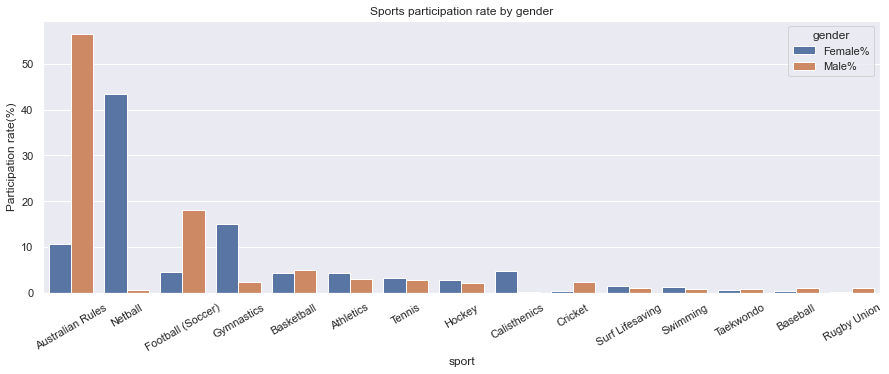

In [16]:
# Plot the pctg participation of sports among males and females
sns.set_theme()

plt.figure(figsize = (15,5))
ax = sns.barplot(x="sport", y="participation", hue='gender', data=t15_melt)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Sports participation rate by gender")
ax.set_ylabel("Participation rate(%)")

### 1-2. Voucher Distribution by LGA

In [17]:
# Group by values by LGA
lga = svs.groupby(['LGA'])[['Vclaim_year']].count()

# Reset index and rename voucher-claimed column
lga.reset_index(inplace=True)
lga.rename(columns={'Vclaim_year':'voucher_claimed'}, 
           inplace=True)

# Sort by voucher claim numbers
lga = lga.sort_values(by='voucher_claimed', ascending=False)

# Show top 10 
lga.head(10).round(1)

,LGA,voucher_claimed
40,ONKAPARINGA,12782
52,SALISBURY,8169
56,TEA TREE GULLY,7219
43,PLAYFORD,6940
10,CHARLES STURT,6897
44,PORT ADELAIDE ENFIELD,6384
29,MARION,5291
1,ADELAIDE HILLS,4756
31,MITCHAM,4662
32,MOUNT BARKER,3469


Here we see the 10 LGAs that have the highest number of vouchers claimed, however this doesn't take into account the size/population of each LGA - bigger LGAs with more children will naturally have higher usage by absolute value. To account for the size factor, we'll calculate a **voucher claim rate** out of the total population for fair comparison.

In [18]:
# Add LGA population from LAG_scores 
lga = lga.join(LGA_scores, on='LGA')
lga = lga[['LGA', 'voucher_claimed', 'Population']]

# Calculate voucher uptake percentage
lga['voucher_claimed%'] = lga['voucher_claimed'] / lga['Population'] * 100

lga.describe().round(1)

,voucher_claimed,Population,voucher_claimed%
count,69.0,62.0,62.0
mean,1848.2,26003.5,10.4
std,2347.7,36229.5,5.7
min,39.0,871.0,0.4
25%,342.0,3022.2,6.4
50%,1010.0,10138.5,10.0
75%,2215.0,28668.0,12.9
max,12782.0,159517.0,37.5


The overall voucher claim rate with respect to LGA population is **10.4%**, and the average LGA size is around 26,000 (population)

In [19]:
# Sort by voucher claim rate
lga = lga.sort_values(by='voucher_claimed%', ascending=False)

lga.head(10).round(1)

,LGA,voucher_claimed,Population,voucher_claimed%
23,KAROONDA EAST MURRAY,388,1035.0,37.5
24,KIMBA,232,1087.0,21.3
66,WUDINNA,267,1256.0,21.3
12,CLEVE,329,1729.0,19.0
53,SOUTHERN MALLEE,342,2097.0,16.3
55,TATIARA,1048,6559.0,16.0
15,ELLISTON,165,1045.0,15.8
41,ORROROO/CARRIETON,137,871.0,15.7
11,CLARE AND GILBERT VALLEYS,1349,8750.0,15.4
61,WAKEFIELD,1010,6663.0,15.2


Ranking the data by **voucher claim rate**, we now see representation of some smaller LGAs - in effect, only Tatiara, Clare and Gilbert Valleys and Wakefield have population greater than 5000. 

This might suggest that smaller participation rate of the voucher program is higher in smaller (and potentially rural) LGAs presumably because sports activities otherwise are relatively limited. However, this can also be due to the other slash of the problem - the data may not be representative when population is too small. 

Let's only focus on LGAs whose population is greater than 10,000.

In [20]:
# Filter out LGAs with population > 10,000
lga_filter = lga.loc[lga['Population']>10000]

# Sort by voucher claim rate and show top 10
lga_filter = lga_filter.sort_values(by='voucher_claimed%', ascending=False)
lga_filter.head(10).round(1)

,LGA,voucher_claimed,Population,voucher_claimed%
46,PORT LINCOLN,2125,14083.0,15.1
4,BAROSSA,2874,22174.0,13.0
33,MOUNT GAMBIER,3271,25254.0,13.0
14,COPPER COAST,1629,12929.0,12.6
3,ALEXANDRINA,2979,23693.0,12.6
1,ADELAIDE HILLS,4756,38601.0,12.3
63,WATTLE RANGE,1398,11632.0,12.0
32,MOUNT BARKER,3469,29806.0,11.6
65,WHYALLA,2488,22070.0,11.3
45,PORT AUGUSTA,1522,13978.0,10.9


Now we have a better overall view of voucher usage - we see larger LGAs like **Alelaide Hills, Alexandria** and **Mount Cambier** as well as smaller ones like **Wattle Range** and **Copper Coast** coming to top.

Now take a look at the botoom.

In [21]:
# Sort by voucher claim rate and show bottom 10
lga_filter = lga_filter.sort_values(by='voucher_claimed%', ascending=True)
lga_filter.head(10).round(1)

,LGA,voucher_claimed,Population,voucher_claimed%
25,KINGSTON,288,72380.5,0.4
0,ADELAIDE,302,19606.0,1.5
8,CAMPBELLTOWN,2567,97060.0,2.6
48,PROSPECT,986,19950.0,4.9
64,WEST TORRENS,2844,54932.0,5.2
7,BURNSIDE,2213,42168.0,5.2
44,PORT ADELAIDE ENFIELD,6384,112797.0,5.7
59,UNLEY,2266,36813.0,6.2
52,SALISBURY,8169,129067.0,6.3
29,MARION,5291,83005.0,6.4


Interestingly, we see mostly big LGAs at the bottom - **Salisbury, Port Adelaide Enfield, Campbelltown** etc. 
So there's some truth in our initial conclusion that smaller LGAs tend to have higher participation rate of the voucher program.

## Q2. Are some sports more popular in different parts of the state?

Due to the number of sports and LGA, we will simplify our analysis by focusing on the top 10 sports by the number of participants and top 15 LGAs by the absolute number of vouchers claimed.

In [22]:
# Filter out top 10 sports
t10_sport = list(sports['sport'].head(10))
svs_t10 = svs.loc[svs['sport'].isin(t10_sport)]

# Group by LGA
lga_sports = svs_t10.groupby(['LGA', 'sport'])['Vclaim_year'].count().unstack()
lga_sports.reset_index(inplace=True)
lga_sports = lga_sports.rename_axis(None, axis=1)

# Add LGA population from LAG_scores 
# lga_sports = lga_sports.join(LGA_scores, on='LGA')
# lga_sports = lga_sports.drop(columns=['IEO', 'IER', 'IRSAD', 'IRSD'])

# Filter out LGAs with top 15 voucher claim numbers
lga = lga.sort_values(by='voucher_claimed', ascending=False)
t15_lga = list(lga['LGA'].head(15))
lga_sports = lga_sports.loc[lga_sports['LGA'].isin(t15_lga)]

# Reset LGA as index 
lga_sports = lga_sports.set_index('LGA')

lga_sports

,Athletics,Australian Rules,Basketball,Calisthenics,Cricket,Football (Soccer),Gymnastics,Hockey,Netball,Tennis
LGA,,,,,,,,,,
ADELAIDE HILLS,204.0,1412.0,48.0,62.0,128.0,812.0,176.0,52.0,1395.0,257.0
ALEXANDRINA,62.0,980.0,204.0,5.0,8.0,510.0,86.0,39.0,860.0,109.0
BAROSSA,158.0,1196.0,341.0,9.0,56.0,197.0,117.0,213.0,445.0,83.0
CAMPBELLTOWN,162.0,1186.0,40.0,26.0,47.0,319.0,248.0,17.0,205.0,154.0
CHARLES STURT,447.0,2147.0,256.0,266.0,137.0,917.0,807.0,87.0,584.0,336.0
MARION,238.0,2362.0,101.0,104.0,155.0,203.0,719.0,57.0,723.0,126.0
MITCHAM,176.0,1939.0,210.0,125.0,89.0,198.0,457.0,123.0,658.0,313.0
MOUNT BARKER,107.0,1230.0,147.0,47.0,65.0,333.0,294.0,36.0,880.0,147.0
MOUNT GAMBIER,86.0,1710.0,168.0,155.0,22.0,502.0,NaN,164.0,393.0,27.0


Again to counter counteract the different sizes LGAs, we'll calculate **percentage participation** of each sport

In [23]:
# Calculate the sum of top 10 sports participants
lga_sports['total']=lga_sports.sum(axis=1)
lga_sports.head(1)

,Athletics,Australian Rules,Basketball,Calisthenics,Cricket,Football (Soccer),Gymnastics,Hockey,Netball,Tennis,total
LGA,,,,,,,,,,,
ADELAIDE HILLS,204.0,1412.0,48.0,62.0,128.0,812.0,176.0,52.0,1395.0,257.0,4546.0


In [24]:
# Calculate pctg participation of top 10 sports

lga_sports_div = lga_sports[['Athletics', 'Australian Rules', 'Basketball', 'Calisthenics',
                             'Cricket', 'Football (Soccer)', 'Gymnastics', 'Hockey', 'Netball',
                             'Tennis']].div(lga_sports['total'], axis=0) * 100
lga_sports_div.round(1)

,Athletics,Australian Rules,Basketball,Calisthenics,Cricket,Football (Soccer),Gymnastics,Hockey,Netball,Tennis
LGA,,,,,,,,,,
ADELAIDE HILLS,4.5,31.1,1.1,1.4,2.8,17.9,3.9,1.1,30.7,5.7
ALEXANDRINA,2.2,34.2,7.1,0.2,0.3,17.8,3.0,1.4,30.0,3.8
BAROSSA,5.6,42.5,12.1,0.3,2.0,7.0,4.2,7.6,15.8,2.9
CAMPBELLTOWN,6.7,49.3,1.7,1.1,2.0,13.3,10.3,0.7,8.5,6.4
CHARLES STURT,7.5,35.9,4.3,4.4,2.3,15.3,13.5,1.5,9.8,5.6
MARION,5.0,49.3,2.1,2.2,3.2,4.2,15.0,1.2,15.1,2.6
MITCHAM,4.1,45.2,4.9,2.9,2.1,4.6,10.7,2.9,15.3,7.3
MOUNT BARKER,3.3,37.4,4.5,1.4,2.0,10.1,8.9,1.1,26.8,4.5
MOUNT GAMBIER,2.7,53.0,5.2,4.8,0.7,15.6,NaN,5.1,12.2,0.8


Text(0.5, 1.0, 'Sport participation rate (%) by LGA')

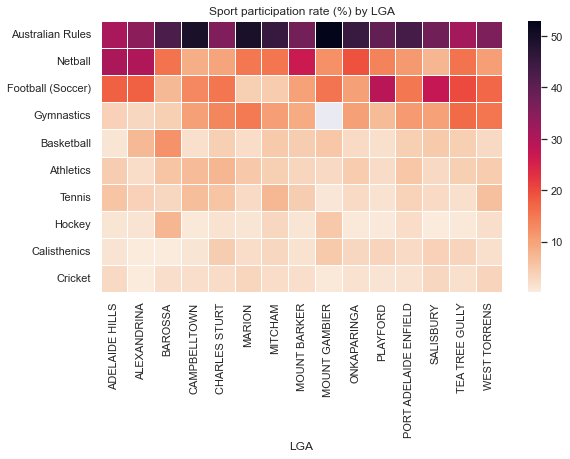

In [25]:
# Prepare data for plotting heatmap
lga_sports_div = lga_sports_div[t10_sport] # Rearrange sport columns in popularity order
lga_sports_div = lga_sports_div.transpose() # Swap rows and columns 

# Create heatmap plot
plt.figure(figsize = (9,5))
cmap=sns.cm.rocket_r
ax = sns.heatmap(lga_sports_div, linewidths=.5, cmap = cmap)
ax.set_title("Sport participation rate (%) by LGA")

From above heatmap, we could see that:

* **Footy** is no doubt the most popular sport across LGAs shown but is particularly so in <u>Mount Gambier</u> and <u>Barossa</u>, but less popular (in relative terms) in Campbelltown and West Torrens; 

* **Netball** has higher than average participation rate in <U>Alexandrina</U>, <u>Adelaide Hills</u> and <u>Mount Barker</u>

* **Soccer** has the highest uptake rate in <u>Playford</u> - with greater popularity of footy and soccer and lower in netball, Playford might have higher male-to-female ratio, similar to Mount Gambier

* **Gymnastics** is the big in <u>Tea Tree Gully</u> but seems not offered at all in Mount Gambier
* **Basketball** and **Hockey** are both most popular in <u>Barrosa</u>


## Q3. Are any electorates over/under represented in their use of vouchers?

**NOTE**: This part was completed <u>before</u> the annoucement that 'electorates' should've been 'LGA' was made on iLearn. I have the confirmation from Steve that I'm allowed to keep the analysis and not have to revert back to LGAs.

In [26]:
# Map LGA to electorate
elec_lga = svs.groupby(['electorate','LGA'])[['ID']].count()
elec_lga = elec_lga.reset_index()
elec_lga = elec_lga.drop(columns='ID', axis=1)
elec_lga.head()

,electorate,LGA
0,ADELAIDE,ADELAIDE
1,ADELAIDE,PROSPECT
2,ADELAIDE,SOUTHERN MALLEE
3,ADELAIDE,WALKERVILLE
4,ASHFORD,KAROONDA EAST MURRAY


In [27]:
# Add population from LGA_scores
elec_lga_pop = elec_lga.join(LGA_scores, on='LGA')
elec_lga_pop = elec_lga_pop[['electorate', 'LGA', 'Population']] # Drop unwanted columns

# Calculate electorate population
elec_pop = elec_lga_pop.groupby('electorate')[['Population']].sum()
elec_pop.head(3)

,Population
electorate,
ADELAIDE,48661.0
ASHFORD,238697.0
BRAGG,80769.0


In [28]:
# Group voucher usage by electorate
elec_v = svs.groupby('electorate')[['ID']].count()

# Add electorate population from elec_pop created above
elec_v = elec_v.rename(columns={'ID':'voucher_claimed'})
elec_vp = elec_v.join(elec_pop, on='electorate')

elec_vp.head(3)

,voucher_claimed,Population
electorate,,
ADELAIDE,1574,48661.0
ASHFORD,2566,238697.0
BRAGG,2211,80769.0


Now we have the number of vouchers claimed by electorate and its respective population. To asnwer the question whether any electorate is over/under-represented, we need to calculate the **share of vouchers used** in each electorate out of total vouchers, and compare it with the **share of population**.
* An electorate is **over-represented** if its voucher share > population share
* An electorate is **udner_represented** if its voucher share < population share

In [29]:
# Calculate share of population for each electorate 
total_pop = elec_vp.sum(axis=0)[1]
elec_vp['pop_share%'] = elec_vp['Population'] / total_pop * 100

# Calculate share of voucher claimed for each electorate
total_voucher = elec_vp.sum(axis=0)[0]
elec_vp['voucher_share%'] = elec_vp['voucher_claimed'] / total_voucher * 100

# Calculate the difference
elec_vp['diff'] = elec_vp['voucher_share%'] - elec_vp['pop_share%']

In [30]:
# Top 5 over represented electorate
elec_vp = elec_vp.sort_values(by='diff', ascending=False)
elec_vp.head().round(2)

,voucher_claimed,Population,pop_share%,voucher_share%,diff
electorate,,,,,
FROME,4445,22377.0,0.33,3.49,3.16
FLINDERS,4242,32468.0,0.48,3.33,2.85
CHAFFEY,4167,31763.0,0.47,3.27,2.80
MOUNT GAMBIER,4066,33094.0,0.49,3.19,2.70
GOYDER,3592,33105.0,0.49,2.82,2.33


These 5 electorates have much higher share of vouchers claimed than its share of population. 
<br>For example, **Frome** only accounts for 0.33% of the SA population, but used 3.49% of all vouchers issued in SA. It's also not surprising to see **Mount Gambier** here, recall that Mount Gambier LGA is among the top 10s. of the highest voucher claim rate.</br>


In [31]:
# Top 5 over under-represented electorate
elec_vp = elec_vp.sort_values(by='diff', ascending=True)
elec_vp.head().round(2)

,voucher_claimed,Population,pop_share%,voucher_share%,diff
electorate,,,,,
DAVENPORT,2427,305434.0,4.49,1.90,-2.58
FLOREY,3147,337325.0,4.95,2.47,-2.49
PLAYFORD,2127,241864.0,3.55,1.67,-1.88
MORPHETT,1774,222573.0,3.27,1.39,-1.88
CROYDON,1707,217719.0,3.20,1.34,-1.86


On the other side, we have these electorates that have higher population share than voucher share. 
<br>For example, **Davenport**, with ~305k residents, accounts for 4.5% of total SA population but its voucher usage was only 1.90% of the total, indicating a lower voucher usage rate.</br>

## Q4. Is there a relationship between any of the SEIFA measures and voucher use in an LGA

### 4.1 Data preparation

In [32]:
# Join SEIFA metrics into the 'lga' df created previously in Q1

lga_seifa = LGA_scores.drop(columns=['Population'], axis=1)
lga_join = lga.join(lga_seifa, on='LGA')
lga_join.head()

,LGA,voucher_claimed,Population,voucher_claimed%,IEO,IER,IRSAD,IRSD
40,ONKAPARINGA,12782,159517.0,8.012939,996.0,996.0,975.0,993.0
52,SALISBURY,8169,129067.0,6.329271,960.0,960.0,924.0,937.0
56,TEA TREE GULLY,7219,95461.0,7.562251,1026.0,1026.0,1019.0,1037.0
43,PLAYFORD,6940,79082.0,8.775701,914.0,914.0,868.0,871.0
10,CHARLES STURT,6897,104922.0,6.573455,957.0,957.0,971.0,976.0


In [33]:
# Check if there's null values 
print('sample size:', lga_join.shape[0],'\n')
print('null values:\n', lga_join.isnull().sum())

sample size: 69 

null values:
 LGA                 0
voucher_claimed     0
Population          7
voucher_claimed%    7
IEO                 7
IER                 7
IRSAD               7
IRSD                7
dtype: int64


In [34]:
# Check null values 
lga_join.loc[lga_join['Population'].isnull()]

,LGA,voucher_claimed,Population,voucher_claimed%,IEO,IER,IRSAD,IRSD
26,LIGHT,2066,NaN,NaN,NaN,NaN,NaN,NaN
47,PORT PIRIE,1935,NaN,NaN,NaN,NaN,NaN,NaN
6,BERRI BARMERA,1486,NaN,NaN,NaN,NaN,NaN,NaN
39,NORWOOD PAYNEHAM AND ST PETERS,1352,NaN,NaN,NaN,NaN,NaN,NaN
36,NARACOORTE LUCINDALE,1097,NaN,NaN,NaN,NaN,NaN,NaN
2,ADELAIDE PLAINS,899,NaN,NaN,NaN,NaN,NaN,NaN
37,NO LGA,625,NaN,NaN,NaN,NaN,NaN,NaN


Notice that there're 6 LGAs (and 'NO LGA') that don't have population and SEIFA data from LGA_scores. Although it's not ideal to imput with mean values of each column as each LGA can be distinct in these measures, we do have to consider that our sample only contains n=68 LGA (69 minus 'NO LGA'), dropping na will further reduce the sample size. 
Hence, we will drop 'NO LGA'for obvious logical reanson and impute the rest.

In [35]:
# Drop 'NO LGA'
lga_join = lga_join.loc[lga_join['LGA'] != 'NO LGA']
print('number of LGAs:', lga_join['LGA'].shape[0])

number of LGAs: 68


In [36]:
# Impute na with mean 
lga_join = lga_join.fillna(lga_join.mean())

# Check na again
print(lga_join.isnull().sum())

LGA                 0
voucher_claimed     0
Population          0
voucher_claimed%    0
IEO                 0
IER                 0
IRSAD               0
IRSD                0
dtype: int64


/var/folders/22/9hdsbk0j58z1r2x79bx2zjh80000gn/T/ipykernel_55637/2693982222.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lga_join = lga_join.fillna(lga_join.mean())


Now we're ready to build models =]

### 4.2 Linear model using only SEIFA as input

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from math import sqrt

Intuitively we know there surely is some correlation between the four SEIFA measures, IEO & IER as a pair and IRSAD & IRSD as a pair in particular. So instead of building a model with four features knowing exactly some will be eliminated, let's go straight into feature selection and choose the most powerful ones from the four.

And we will use voucher claim rate as opposed to voucher claim number as independent variable to reduce the impact of population as discussed in previous sections.

In [38]:
# Set up for RFE
feature_cols = np.array(['IEO', 
                         'IER',
                         'IRSAD', 
                         'IRSD'])

X = lga_join[feature_cols]
y = lga_join['voucher_claimed%']

# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (54, 4)
y_train shape:  (54,)
X_test shape:  (14, 4)
y_test.shape:  (14,)


In [39]:
R2 = []
MSE = []

for i in range(1,5):
    estimator = linear_model.LinearRegression()
    selector = RFE(estimator, i) # select i features
    selector = selector.fit(X_train, y_train) # fit selector on training set
    
    # Predict on test set
    y_pred_test = selector.predict(X_test) 
    
    # Get R2 and MSE on test set
    r2 = r2_score(y_test, y_pred_test)
    mse = ((np.array(y_test)-y_pred_test)**2).sum()/len(y_test)

    # print this
    print("R2 on test set using", i, "features: ", "{:.3f}".format(r2))
    R2.append(r2)     # append to the list
    
    print("MSE on test set using", i, "features: ", "{:.3f}".format(mse),"\n")
    MSE.append(mse)

R2 on test set using 1 features:  -0.190
MSE on test set using 1 features:  27.458 

R2 on test set using 2 features:  0.384
MSE on test set using 2 features:  14.217 

R2 on test set using 3 features:  0.213
MSE on test set using 3 features:  18.165 

R2 on test set using 4 features:  0.213
MSE on test set using 4 features:  18.165 



/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/

From above we could see that 2 features yielded the best performance on the test set among all, even though the fit wasn't great across the board. <br>Regardless let's find out what these feature is and evaluate if there's overfitting issues.</br>

In [40]:
# Show selected 2 features

estimator = linear_model.LinearRegression()
selector2 = RFE(estimator, 2)
selector2 = selector2.fit(X_train, y_train)

supp = selector2.get_support()
print("Selected features:", feature_cols[supp])

Selected features: ['IRSAD' 'IRSD']


/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [41]:
coef1 = selector2.estimator_.coef_[0]
coef2 = selector2.estimator_.coef_[1]
print("Regression function: y =",'{:.2f}'.format(coef1),"* IRSAD + ",
      '{:.2f}'.format(coef2),"* IRSD",
     '{:.2f}'.format(selector2.estimator_.intercept_))

Regression function: y = -0.31 * IRSAD +  0.32 * IRSD -3.58


The function shows that IRSAD is negatively correlated to voucher claim rate whereas IRSD contributes positively to voucher usage, indicating that **socio-economically disadvantaged LGAs have higher voucher claim rate**. Even though the program may not set out with the sole purpose of providing free access to sports to childern from disadvantaged households, it ended up having this impact, which is actually quite encouraging.

Before we jump in the conclusion, let's check the model performance on the training set and see if there's significant difference vs. on the test set.

In [42]:
y_pred_train = selector2.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
mse_train = ((np.array(y_train)-y_pred_train)**2).sum()/len(y_train)

print("r2 on training set:", "{:.3f}".format(r2_train))
print("mse on training set:", "{:.3f}".format(mse_train))

r2 on training set: 0.238
mse on training set: 23.177


At this point, we must acknowledge that the model fit wasn't particularly good - we see some gap between performance and the test set and the training set, although it's likely due to the limited sample size and random seed likely played an unnecessarily important role in determining the fit.

At the mean time, there are other factors affecting voucher claim rate that aren't captured by our model. Meanwhile, there're other information in the dataset that haven't been utilised but may play a role in voucher usage - **ASTI, CALD, prev_member and gender**. We'll try to build them into our model as well.

### 4.3 Linear model with IRSAD, IRSD and demographics

First, we'll have to prepare the four categorical variables into desired format and merge them into our dataframe.

In [43]:
# Convert ASTI, CALD, prev_member and gender into binary
svs.loc[svs['gender']=='Male', 'gender'] = 1
svs.loc[svs['gender']=='Female', 'gender'] = 0

svs.loc[svs['ATSI']=='ATSI', 'ATSI'] = 1
svs.loc[svs['ATSI']=='Not ATSI', 'ATSI'] = 0

svs.loc[svs['CALD']=='CALD', 'CALD'] = 1
svs.loc[svs['CALD']=='Not CALD', 'CALD'] = 0

svs.loc[svs['prev_member']=='Registered Previously', 'prev_member'] = 1
svs.loc[svs['prev_member']=='Not Registered Previously', 'prev_member'] = 0

# Cast as float
svs.gender = svs.gender.astype(float)
svs.ATSI = svs.ATSI.astype(float)
svs.CALD = svs.CALD.astype(float)
svs.prev_member = svs.prev_member.astype(float)

In [44]:
# Group by values by LGA
atsi = svs.groupby(['LGA'])[['ATSI']].sum()
cald = svs.groupby(['LGA'])[['CALD']].sum()
prev_member = svs.groupby(['LGA'])[['prev_member']].sum()
male = svs.groupby(['LGA'])[['gender']].sum()

In [45]:
# Join ATSI, CALD, prev_member and gender with the main LGA df
lga_join = lga_join.join(atsi, on='LGA')
lga_join = lga_join.join(cald, on='LGA')
lga_join = lga_join.join(prev_member, on='LGA')
lga_join = lga_join.join(male, on='LGA')

In [46]:
# Convert ATSI, CALD, prev member and male to pctg

lga_join['ATSI%'] = lga_join['ATSI'] / lga_join['Population'] * 100
lga_join['CALD%'] = lga_join['CALD'] / lga_join['Population'] * 100
lga_join['pr_member%'] = lga_join['prev_member'] / lga_join['Population'] * 100
lga_join['male%'] = lga_join['gender'] / lga_join['Population'] * 100

lga_join = lga_join.drop(columns=['ATSI','CALD','prev_member','gender'], axis=1) # drop absolute columns

lga_join.head()

,LGA,voucher_claimed,Population,voucher_claimed%,IEO,IER,IRSAD,IRSD,ATSI%,CALD%,pr_member%,male%
40,ONKAPARINGA,12782,159517.0,8.012939,996.0,996.0,975.0,993.0,0.175530,0.300908,4.267257,4.623332
52,SALISBURY,8169,129067.0,6.329271,960.0,960.0,924.0,937.0,0.221590,0.816630,3.893327,4.231136
56,TEA TREE GULLY,7219,95461.0,7.562251,1026.0,1026.0,1019.0,1037.0,0.086947,0.472444,5.091084,4.380847
43,PLAYFORD,6940,79082.0,8.775701,914.0,914.0,868.0,871.0,0.407172,0.614552,5.241395,5.597987
10,CHARLES STURT,6897,104922.0,6.573455,957.0,957.0,971.0,976.0,0.181087,0.794876,3.792341,3.884791


Now we're ready to build on our previous model of IRSAD, IRSD and add these four new variables as input.

In [47]:
# Build a new linear model with IRSAD, IRSD and the new four variables
feature_cols = np.array(['IRSAD', 
                         'IRSD', 
                         'ATSI%', 
                         'CALD%', 
                         'pr_member%', 
                         'male%'])

X = lga_join[feature_cols]
y = lga_join['voucher_claimed%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (54, 6)
y_train shape:  (54,)
X_test shape:  (14, 6)
y_test.shape:  (14,)


In [48]:
# Fit the model with training set
lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)

# Predict on training set
y_pred_train = lm.predict(X_train)

# Evaluate model performance on training set
r2_train = r2_score(y_train, y_pred_train)
mse_mse = ((np.array(y_train)-y_pred_train)**2).sum()/len(y_train)

print("R2 with 6 features (train):", "{:.3f}".format(r2_train))
print("MSE with 6 features (train):", "{:.3f}".format(mse_train))

R2 with 6 features (train): 0.912
MSE with 6 features (train): 23.177


In [49]:
# Predict on test set
y_pred_test = lm.predict(X_test)

# Evaluate model performance on test set
r2_test = r2_score(y_test, y_pred_test)
mse_test = ((np.array(y_test)-y_pred_test)**2).sum()/len(y_test)

print("R2 with 6 features (test):", "{:.3f}".format(r2_test))
print("MSE with 6 features (test):", "{:.3f}".format(mse_test))

R2 with 6 features (test): 0.909
MSE with 6 features (test): 2.102


First we're seeing considerable improvement versus of 2 feature (IRSAD, IRSD) baseline model, test r2 improved from 0.38 to 0.91. This 6 feature model also produced fairly consistent performance across the training and the test set, with minimal reduction in r2 and some fortunate improvement in MSE (likely due to random state selection).

Let's have a look at the coefficients of the 6 features and see which are more influential than others.

In [50]:
for i in range(0,6):
    print("coefficient of", feature_cols[i],":", "{:.2f}".format(lm.coef_[i]))

coefficient of IRSAD : -0.06
coefficient of IRSD : 0.06
coefficient of ATSI% : -0.06
coefficient of CALD% : 0.68
coefficient of pr_member% : 0.92
coefficient of male% : 0.36


Interesting findings here: comparing to the demographic features, the two SEIFA feature we included from the previous model become secondary. Features, by the magnitude of coefficients, that have greater impact on voucher usage rage are:
1. Pctg of childern who are already a member of a sports club (before using the voucher)
2. Pctg of childern from a culturally & linguistically diverse background (CALD)
3. Gender

If we run another RFE on a total set of SEIFA (x4) measures and demographic features (x4), we might end up with an optimal selection completely free of SEFIFA variables. However, this is out of the scope of this question and we won't do it here.

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [51]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [52]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

/var/folders/22/9hdsbk0j58z1r2x79bx2zjh80000gn/T/ipykernel_55637/1542685289.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


### Data Preparation

In [53]:
# Drop unwanted columns
qvs = qld_vouchers_scores.drop(columns=['Application Number',
                                        'Club Name'])

# Rename long column names
rename_cols= {'Voucher Number': 'voucher_no', 
              'Child Age (at time of Application)': 'child_age', 
              'Has your child played sport before?': 'prev_sport', 
              'Participation Activity': 'activity',
              'Club Name': 'club_name',
              'Club Suburb/Town': 'club_sub', 
              'Club Local Government Area Name': 'club_LGA',
              'Club State Electoral District  Name': 'club_electorate', 
              'Parent Suburb/Town': 'parent_sub',}

qvs.rename(columns=rename_cols, inplace=True)
qvs.head(1)

,voucher_no,child_age,Gender,prev_sport,activity,club_sub,club_LGA,club_electorate,parent_sub,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,Q89QDUXP,10,NaN,Yes,*Other,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0


In [54]:
# Check df shape and null value
print('number of entry:', qvs.shape[0],'\n')
print('number of na in each column:\n',
      qvs.isnull().sum())

number of entry: 9507 

number of na in each column:
 voucher_no            0
child_age             0
Gender             9507
prev_sport            4
activity              0
club_sub              0
club_LGA              0
club_electorate       0
parent_sub            0
Total Payment         0
LGA                   0
IEO                 519
IER                 519
IRSAD               519
IRSD                519
Population          519
dtype: int64


Note that in the QLD data, gender of the participants is actually not available despite having a variable for it. 

In [55]:
# Drop the gender column
qvs = qvs.drop(columns='Gender',axis=1)

### Map Activity Names

First start by checking how many sports/activities are offered in QLD in comparison with SA.

In [56]:
# Check sports provided in QLD vs. SA
print("Number of sports in QLD:", qvs['activity'].nunique())
print("Number of sports in SA:", svs['sport'].nunique())

Number of sports in QLD: 66
Number of sports in SA: 50


Just by looking at the number of sports, it seems QLD offers a greater variety of activities. It is of our interest to find out how many of them overlap with those offered in SA, and those activities will the focus of our analysis. There're two possibilities:
* Sports offered in both states,**under the same name**
* Sports offered in both states, **under different names**


In [57]:
# Extract sports offered in QLD
qvs_sports = list(qvs['activity'].unique())
qvs_sports = sorted(qvs_sports)

# Extract sports offered in SA
svs_sports = list(svs['sport'].unique())
svs_sports = sorted(svs_sports)

In [58]:
# Sports offered in both states AND have the same names

shared = sorted(list(set(svs_sports) & set(qvs_sports)))

print('Shared list:\n', shared,'\n')
print('Exact match:', len(shared))

Shared list:
 ['Archery', 'Athletics', 'Baseball', 'Basketball', 'Calisthenics', 'Cricket', 'Cycling', 'Dancesport', 'Equestrian', 'Football (Soccer)', 'Golf', 'Gymnastics', 'Hockey', 'Ice Skating', 'Ju Jitsu', 'Judo', 'Karate', 'Netball', 'Roller Sports', 'Rowing', 'Rugby League', 'Rugby Union', 'Sailing', 'Shooting', 'Softball', 'Squash', 'Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Touch', 'Weightlifting'] 

Exact match: 32


So, out of the 66 sports offered in QLD there're 32 exact match with those in SA. Now our task is to find activities that are essentially the same but are just called different names.

In [59]:
# Sports offered in QLD only 
qld_only = sorted(list(set(qvs_sports) - set(svs_sports)))
qld_only = pd.DataFrame(qld_only, columns=['sports'])
qld_only['state'] = 'QLD'

# Sports offered in SA only 
sa_only = sorted(list(set(svs_sports) - set(qvs_sports)))
sa_only = pd.DataFrame(sa_only, columns=['sports'])
sa_only['state'] = 'SA'

# Concatenate the two 
compare_state = pd.concat([qld_only, sa_only])
compare_state = compare_state.sort_values(by='sports', ascending=True)
compare_state

,sports,state
0,*Other,QLD
1,Australian Football,QLD
0,Australian Rules,SA
1,BMX,SA
2,BMX Bicycle Motocross,QLD
2,Badminton,SA
3,Body Boarding,QLD
3,Bowls,SA
4,Bowls Lawn,QLD
5,Boxing,QLD


Look closely at the list above, we're able to figure out the sports that are actually offered in both states but are under different names:
* Australian Rules (SA) - Australian Football (QLD)
* BMX (SA) - BMX Bicycle Motocross (QLD)
* Bowls (SA) - Bowls lawn (QLD)
* Motorcycling (SA) - Motor Cycling (QLD)
* Surf Lifesaving (SA) - Life Saving Surf (QLD)
* Surf Riding (SA) - Surfing (QLD)
* Pony Clubs (SA) - Pony Club (QLD)
* Paralympic (SA) -  Disability Sports (QLD)

We are going to rename them by SA names.

In [60]:
# Rename QLD sports to match SA names

QLD_name = ['Australian Football', 'BMX Bicycle Motocross', 'Bowls Lawn', 'Motor Cycling', 
            'Life Saving Surf','Surfing', 'Pony Club', 'Disability Sports']

SA_name = ['Australian Rules', 'BMX', 'Bowls', 'Motorcycling', 
           'Surf Lifesaving', 'Surf Riding', 'Pony Clubs', 'Paralympics']

for i in list(range(0,8)):
    qvs.loc[qvs['activity']==QLD_name[i], 'activity'] = SA_name[i]

In [61]:
# Re-run shared list between two states after renaming

print("old shared list length:", len(shared))

qvs_sports = list(qvs['activity'].unique())
shared = sorted(list(set(svs_sports) & set(qvs_sports)))

print("new shared list length:", len(shared))

old shared list length: 32
new shared list length: 40


After renaming the 8 activities, we're able to match 40 sports offered in QLD to that in SA. There's one final step before we can start the actual analysis - group all other sports into 'others'.

In [62]:
# Group all sports that are not in the shared list as 'others'
svs.loc[~svs['sport'].isin(shared), 'sport']='Others'
qvs.loc[~qvs['activity'].isin(shared),'activity']='Others'

print(svs['sport'].nunique())
print(qvs['activity'].nunique())

41
41


### Comparing the popularity of Sports in QLD vs. in SA

In [63]:
# Group number of vouchers by sports - SA

svs_sport = svs.groupby('sport')[['ID']].count()
svs_sport = svs_sport.rename(columns={'ID':'SA_voucher'})

SA_total = svs_sport.sum()
svs_sport['SA_voucher%'] = svs_sport['SA_voucher'] / SA_total[0] * 100

svs_sport.reset_index(inplace=True)
svs_sport.head().round(1)

,sport,SA_voucher,SA_voucher%
0,Archery,34,0.0
1,Athletics,4518,3.5
2,Australian Rules,47224,37.0
3,BMX,157,0.1
4,Baseball,865,0.7


In [64]:
# Group number of vouchers by sports - QLD

qvs_sport = qvs.groupby('activity')[['voucher_no']].count()
qvs_sport = qvs_sport.rename(columns={'voucher_no':'QLD_voucher'})
qvs_sport.index.name = 'sport'

QLD_total = qvs_sport.sum()
qvs_sport['QLD_voucher%'] = qvs_sport['QLD_voucher'] / QLD_total[0] * 100

qvs_sport.head().round(1)

,QLD_voucher,QLD_voucher%
sport,,
Archery,7,0.1
Athletics,97,1.0
Australian Rules,548,5.8
BMX,47,0.5
Baseball,5,0.1


In [65]:
# Join the two sports DF together on shared sports

compare_sport = svs_sport.join(qvs_sport, on='sport')
compare_sport = compare_sport.set_index('sport')

# Show top 15 sports in QLD
compare_sport = compare_sport.sort_values(by='QLD_voucher%', ascending=False)
compare_sport.head(15).round(1)

,SA_voucher,SA_voucher%,QLD_voucher,QLD_voucher%
sport,,,,
Rugby League,270,0.2,2782,29.3
Football (Soccer),15775,12.4,2074,21.8
Netball,24017,18.8,1263,13.3
Australian Rules,47224,37.0,548,5.8
Gymnastics,9823,7.7,539,5.7
Basketball,6016,4.7,376,4.0
Rugby Union,734,0.6,342,3.6
Others,1065,0.8,306,3.2
Hockey,3026,2.4,271,2.9


In [66]:
# Prepare data for plotting 
compare_t15 = compare_sport.head(15).round(1)
compare_t15.reset_index(inplace=True)
compare_t15 = compare_t15[['sport', 'SA_voucher%', 'QLD_voucher%']] # Drop unwanted columns
compare_t15 = compare_t15.rename(columns={'SA_voucher%':'SA', 'QLD_voucher%':'QLD'})

# Melt the data
compare_melt = pd.melt(compare_t15, id_vars="sport", var_name="state", value_name="voucher_usage")

Text(0, 0.5, 'Sports of choice(%)')

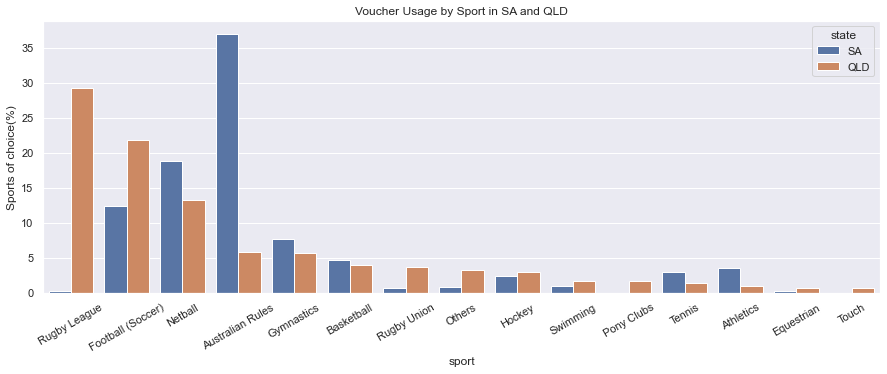

In [67]:
# Plot the pctg participation of sports among males and females
plt.figure(figsize = (15,5))
ax = sns.barplot(x="sport", y="voucher_usage", hue='state', data=compare_melt)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Voucher Usage by Sport in SA and QLD")
ax.set_ylabel("Sports of choice(%)")

From above graph we could see a lot of difference in sports preference between the two states:
* **Rugby League** is the number 1 sport in QLD however has very little popularity in SA, on the other hand, SA's most popular **Australian Rules** only ranked the 4th place in QLD; **Rugby union** is also more popular in QLD
* **Football (soccer)** and **Netball** are among top3 in both states. Football is more popular in QLD whereas netball is the other way around
* **Tennis** and **Athletics** have more representation in SA than in QLD